# Step 1: Importing the required python packages 
* We need Pandas for data manipulation, NumPy for mathematical calculations, MatplotLib and Seaborn for visualizations.

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

# Step 2: Loading the dataset
* Download the dataset, upload it to your notebook and read it into the pandas dataframe.

In [181]:
delivery= pd.read_csv("C:/Users/Shreeji/Desktop/delivery.dataset.csv")

In [114]:
deli= delivery.copy() #creating a copy so the original dataframe isn't altered

In [183]:
deli.head()

Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10

# Step 3: Data analysis
* Now that we have our data ready, let's analyze and understand its trend in detail. To do that we can first describe the data below -

In [119]:
deli.describe()

Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000

#Here, we can see Delivery Time ranges from 8 to 29 with a median of 17.83	.

In [122]:
deli.head()

Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10

In [124]:
deli.isnull().sum() #we can check if there are any null values, if found we can know their sum.

Delivery Time    0
Sorting Time     0
dtype: int64

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

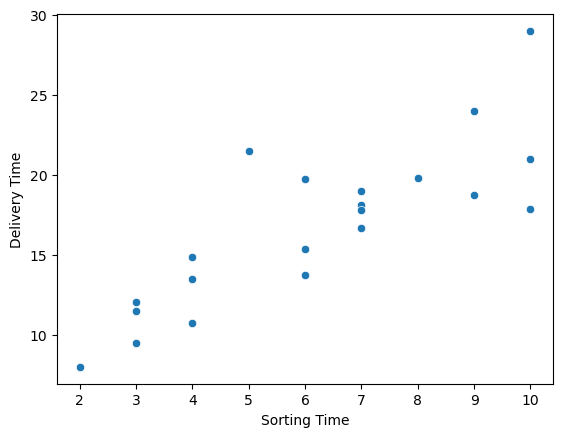

In [126]:
# Relationship between Sorting Time and Delivery Time using Seaborn
sns.scatterplot(x= deli['Sorting Time'], y= deli['Delivery Time'], data=deli)

#It is clearly visible now, our data varies linearly. That means the faster the sorting is done, faster the goods will be delivered.

# Step 4: Split the dataset into dependent/independent variables

- Split the DataFrame into input features X ('Sorting Time') and target variable y ('Delivery Time').

In [131]:
# Split the data into features (Sorting Time) and target (Delivery Time) 
X = deli[['Sorting Time']] 
y = deli['Delivery Time']

# Step 5: Split data into Train/Test sets

- Split the data into training and testing sets using 80% for training and 20% for testing.The random_state=42

In [135]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize a linear regression model.

In [138]:
# Create a Linear Regression model 
model = LinearRegression()

# Step 7: Train the regression model

- Train the linear regression model using the training data.

In [142]:
# Train the model on the training data 
model.fit(X_train, y_train)

LinearRegression()

# Step 8: Predict the result

- Use the trained model to make predictions on the test data and calculate the R-squared score (r2) and Mean Squared Error (mse) to evaluate the model’s performance.


In [148]:
# Make predictions on the test data 
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test) 
r2 = r2_score(y_test, y_pred)
r2

-1.0207599586367362

# Step 9: Plot the training and test results


- Plots the test data points and the fitted line obtained from the linear regression model. Labels the axes, provides a title, and shows the plot.

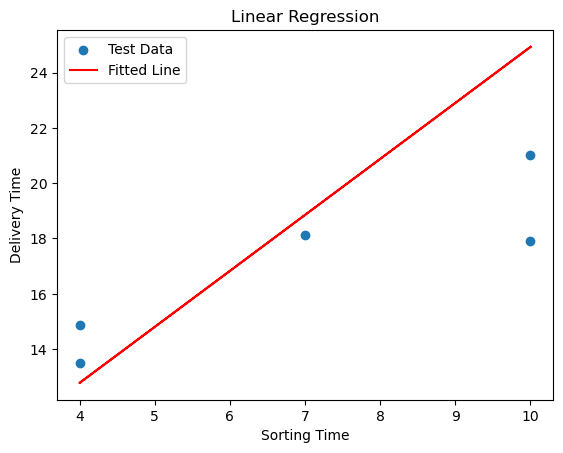

In [154]:
# Plot the data points and the fitted line 
plt.scatter(X_test, y_test, label='Test Data') 
plt.plot(X_test, y_pred, color='red', label='Fitted Line')
plt.xlabel('Sorting Time') 
plt.ylabel('Delivery Time') 
plt.title('Linear Regression') 
plt.legend() 
plt.show()

- Print the Mean Squared Error and R-squared Error calculated earlier, providing insights into the model’s accuracy and fit to the data.

In [157]:
mse = mean_squared_error(y_test, y_pred) 
print(f"Mean Squared Error: {mse:.2f}") 
print(f"R-Squared Error: {r2:.2f}")

Mean Squared Error: 14.05
R-Squared Error: -1.02


# Time to Predict the Delivery time based on Sorting time

In [170]:
import numpy as np
Sorting =int(input("Enter Sorting time "))
# Assume you have a new sorting value for prediction, for example, 2 days
new_Sorting_time = np.array([Sorting]).reshape(-1, 1)
# Make predictions using the trained model
predicted_Delivery_time = model.predict(new_Sorting_time)
# Display the prediction
print(f"Predicted delivery time for {new_Sorting_time[0][0]} days of Sorting time= {predicted_Delivery_time[0]:,.2f} days")

Enter Sorting time  2


Predicted delivery time for 2 days of Sorting time= 8.73 days


C:\Users\Shreeji\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
